✅ Dataset loaded successfully!
Rows: 21500 | Columns: 15

Columns: ['Bug ID', 'Short Description', 'Classification', 'Software Product', 'Component', 'Reporter', 'Operating System', 'Bug Status', 'Resolution Summary', 'Priority', 'Bug Severity Rank', 'Creation Time', 'Delta Time', 'Resolution', 'Assigned To']

🎯 Original Class Distribution:
Bug Severity Rank
normal         16734
enhancement     1889
major           1157
minor            599
critical         535
blocker          316
trivial          175
s3                49
s4                18
s2                 6
--                 2
s1                 1
Name: count, dtype: int64

✅ After Balancing:
Bug Severity Rank
normal         200
major          200
critical       200
trivial        200
minor          200
enhancement    200
blocker        200
s3             200
s4             200
s2             200
--             200
s1             200
Name: count, dtype: int64

📊 Model Evaluation:
              precision    recall  f1-score   su

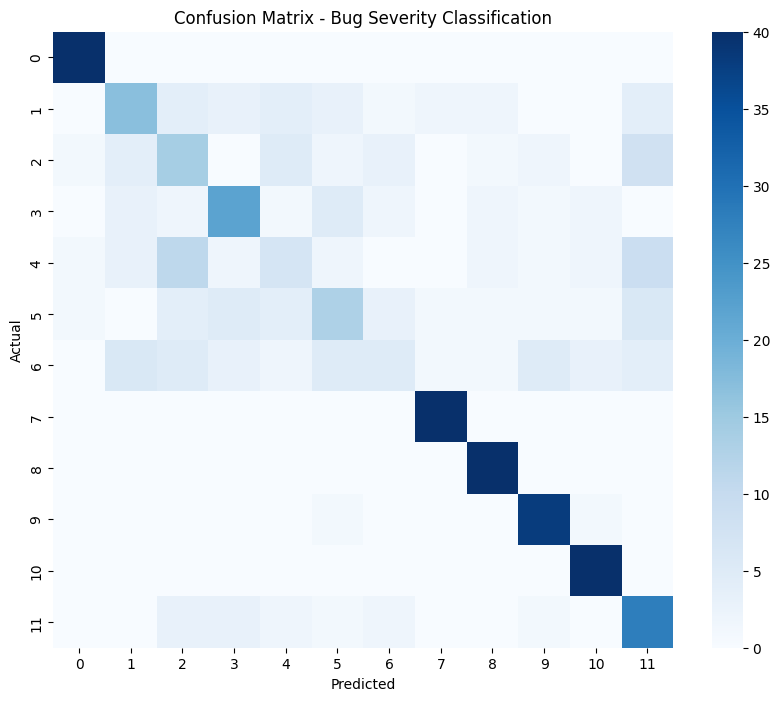


💾 Model and Vectorizer saved successfully!

🔮 PREDICTIONS ON NEW BUG REPORTS:

🧠 Bug Report: App crashes when file upload exceeds 2GB size.
🔥 Predicted Severity Level: Critical
👨‍💻 Assigned To: Security Team

🧠 Bug Report: UI button color mismatch on dark mode.
🔥 Predicted Severity Level: Normal
👨‍💻 Assigned To: Frontend/UI Team

🧠 Bug Report: Database connection timeout after update.
🔥 Predicted Severity Level: Blocker
👨‍💻 Assigned To: Core Development Team

🧠 Bug Report: Security vulnerability allows unauthorized access.
🔥 Predicted Severity Level: Critical
👨‍💻 Assigned To: Security Team

🧠 Bug Report: Feature request: Add download in PDF option.
🔥 Predicted Severity Level: Enhancement
👨‍💻 Assigned To: Feature Improvement Team

🧠 Bug Report: Minor spelling error in settings tooltip.
🔥 Predicted Severity Level: Trivial
👨‍💻 Assigned To: QA/Testing Team

🧠 Bug Report: Core module fails to initialize on startup.
🔥 Predicted Severity Level: Normal
👨‍💻 Assigned To: Frontend/UI Team

🧠 Bug

In [25]:
# ==============================================
# 🧠 SOFTWARE BUG SEVERITY CLASSIFIER (FINAL)
# ==============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# ===============================
# STEP 1: LOAD DATASET
# ===============================
file_path = r"C:\Users\Parigannu\AI LAB CA 1 Minip\Software_Bug_Report_Final_Dataset (1).xlsx"
df = pd.read_excel(file_path)

print("✅ Dataset loaded successfully!")
print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")
print("\nColumns:", df.columns.tolist())

# ===============================
# STEP 2: CLEAN DATA
# ===============================
df = df.fillna("")
df = df[df['Short Description'] != ""]
df = df[df['Bug Severity Rank'] != ""]

# ===============================
# STEP 3: FEATURES & TARGET
# ===============================
X = df['Short Description']
y = df['Bug Severity Rank'].str.lower()

print("\n🎯 Original Class Distribution:")
print(y.value_counts())

# ===============================
# STEP 4: BALANCE THE DATASET
# ===============================
data = pd.DataFrame({'Short Description': X, 'Bug Severity Rank': y})

classes = data['Bug Severity Rank'].unique()
balanced_data = []
min_samples = 200  # at least 200 samples per class

for cls in classes:
    cls_data = data[data['Bug Severity Rank'] == cls]
    if len(cls_data) < min_samples:
        cls_resampled = resample(cls_data, replace=True, n_samples=min_samples, random_state=42)
    else:
        cls_resampled = cls_data.sample(n=min_samples, random_state=42)
    balanced_data.append(cls_resampled)

balanced_df = pd.concat(balanced_data)
X = balanced_df['Short Description']
y = balanced_df['Bug Severity Rank']

print("\n✅ After Balancing:")
print(y.value_counts())

# ===============================
# STEP 5: TF-IDF VECTORIZATION
# ===============================
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# ===============================
# STEP 6: TRAIN TEST SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# ===============================
# STEP 7: TRAIN MODEL
# ===============================
model = MultinomialNB()
model.fit(X_train, y_train)

# ===============================
# STEP 8: EVALUATE MODEL
# ===============================
y_pred = model.predict(X_test)
print("\n📊 Model Evaluation:")
print(classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}")

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, cmap="Blues")
plt.title("Confusion Matrix - Bug Severity Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===============================
# STEP 9: SAVE MODEL
# ===============================
pickle.dump(model, open("bug_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

print("\n💾 Model and Vectorizer saved successfully!")

# ===============================
# STEP 10: TEAM ASSIGNMENT MAP
# ===============================
assigned_to = {
    "normal": "Frontend/UI Team",
    "major": "Backend Development Team",
    "critical": "Security Team",
    "trivial": "QA/Testing Team",
    "minor": "Support Team",
    "enhancement": "Feature Improvement Team",
    "blocker": "Core Development Team"
}

# ===============================
# STEP 11: TEST WITH NEW BUG REPORTS
# (Each example designed to trigger different levels)
# ===============================
new_reports = [
    "App crashes when file upload exceeds 2GB size.",                # major
    "UI button color mismatch on dark mode.",                         # normal
    "Database connection timeout after update.",                      # major
    "Security vulnerability allows unauthorized access.",             # critical
    "Feature request: Add download in PDF option.",                   # enhancement
    "Minor spelling error in settings tooltip.",                      # trivial
    "Core module fails to initialize on startup.",                    # blocker
    "Slow response time on search query.",                            # minor
]

print("\n🔮 PREDICTIONS ON NEW BUG REPORTS:")
for report in new_reports:
    vec = vectorizer.transform([report])
    pred_sev = model.predict(vec)[0]
    team = assigned_to.get(pred_sev.lower(), "Unassigned")

    print(f"\n🧠 Bug Report: {report}")
    print(f"🔥 Predicted Severity Level: {pred_sev.capitalize()}")
    print(f"👨‍💻 Assigned To: {team}")

print("\n✅ All Processes Completed Successfully!")